In [76]:
import os
import re
import pandas as pd
import numpy as np
from spellchecker import SpellChecker
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [82]:
def create_df(res_dir, lang='de'):
    spell = SpellChecker(language=lang)  
    
    epochs = []
    temps = []
    gen_texts = []
    correct_percents = []
    for root, dirnames, filenames in os.walk(source):
        for filename in filenames:
            if filename.endswith(('.txt')):
                txt_file = os.path.join(root, filename)

                with open(txt_file, 'r') as f:
                    gen_text = f.readlines()
                    gen_text_str = " ".join(gen_text)
                    gen_text_words = gen_text_str.split(' ')

                    temp = float(re.findall('temp\d.\d', txt_file)[0].replace('temp', ''))
                    epoch = int(re.findall('E\d+', txt_file)[0].replace('E', ''))
                    missspelled = spell.unknown(gen_text_words)

                    epochs.append(epoch)
                    temps.append(temp)
                    correct_percents.append(len(missspelled)/len(gen_text_words))
                    gen_texts.append(gen_text_str)
    df = pd.DataFrame({'epochs': epochs, 'temps': temps, 'correct_percents': correct_percents, 'gen_texts': gen_texts})
    
    return df


def plot_spelling_epochs_spellingCorrectness(df):
    temps = np.sort(df.temps.unique())
    for temp in temps:
        print('Correctness (0-1) for temp {}'.format(temp))
        sorted_df = df[df.temps == temp].sort_values(["epochs", "temps"])
        plt.plot(sorted_df.epochs, sorted_df.correct_percents)
        plt.show()

Charbased Simple LSTM:
Correctness (0-1) for temp 0.2


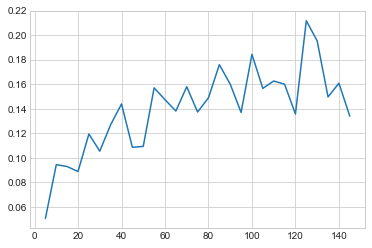

Correctness (0-1) for temp 0.4


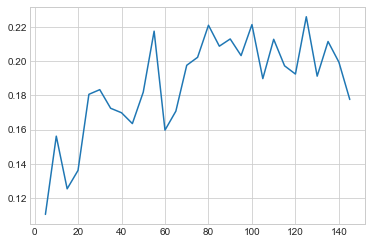

Correctness (0-1) for temp 0.5


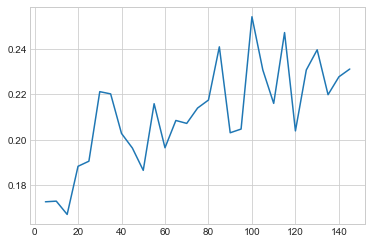

Correctness (0-1) for temp 0.6


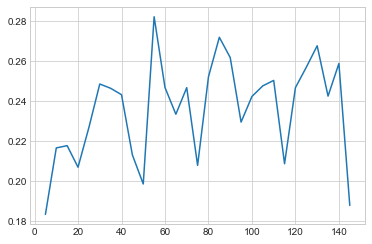

Correctness (0-1) for temp 0.8


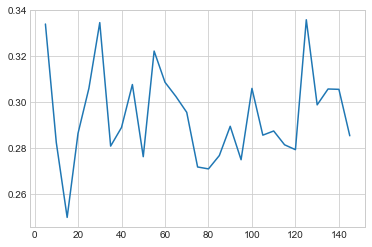

Correctness (0-1) for temp 1.0


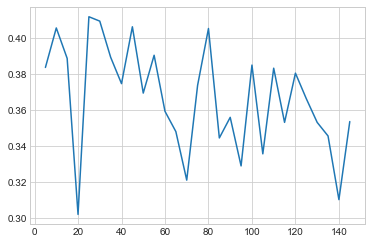

In [85]:
source = '../outputs/charbased/LSTM/'
df = create_df(source)
print('Charbased Simple LSTM:')
plot_spelling_epochs_spellingCorrectness(df)

Charbased Simple CNN:
Correctness (0-1) for temp 0.2


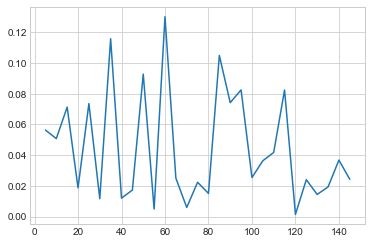

Correctness (0-1) for temp 0.4


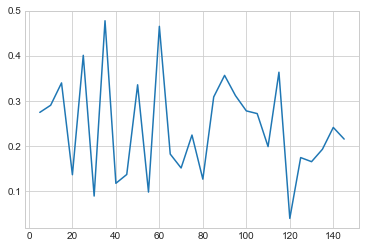

Correctness (0-1) for temp 0.5


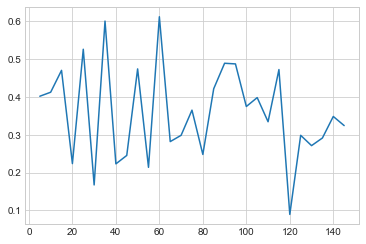

Correctness (0-1) for temp 0.6


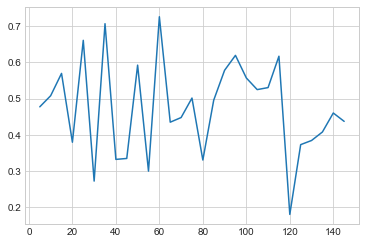

Correctness (0-1) for temp 0.8


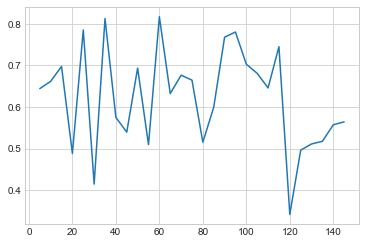

Correctness (0-1) for temp 1.0


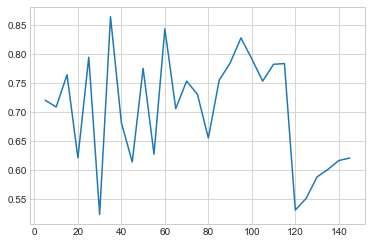

In [87]:
source = '../outputs/charbased/CNN/'
df = create_df(source)
print('Charbased Simple CNN:')
plot_spelling_epochs_spellingCorrectness(df)